In [1]:
import load_data 
import network 
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

In [2]:
path = './data/'
filename = 'dataset_batch_3.mat'
train_input_dataset,train_output_dataset = load_data.load_dataset(path,filename)
print(train_input_dataset.shape,train_output_dataset.shape)

(1189, 200, 128, 128) (1189, 128, 128)


In [3]:
# path = './data/'
# filename = 'dataset_batch_2.mat'
# test_input_dataset,test_output_dataset = load_data.load_dataset(path,filename)
# print(test_input_dataset.shape,test_output_dataset.shape)
# testing_dataset = load_data.DeconvolutionDataset(test_input_dataset,test_output_dataset,transform=load_data.ToTensor())

In [4]:
path = './data/'
filename = 'dataset_test.mat'
test_input_dataset,test_output_dataset = load_data.load_dataset(path,filename)

In [5]:
training_dataset = load_data.DeconvolutionDataset(train_input_dataset,train_output_dataset,transform=load_data.ToTensor())
dataloader = DataLoader(training_dataset, batch_size=80,shuffle=True, num_workers=4)

In [6]:
device = torch.device("cuda:1")
model = network.FullyConvNet_1()
# model = nn.DataParallel(model)
# model.cuda()
model.to(device)

# criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss()
# optimizer = optim.SGD(model.parameters(), lr=1e-9)
optimizer = optim.Adam(model.parameters(), lr=1e-6)

In [7]:
num_epochs = 10000
for epoch in range(num_epochs):
    for batch_idx, sample in enumerate(dataloader):
        inputs,target = sample['input'].to(device),sample['output'].to(device)
#         inputs,target = sample['input'].cuda(),sample['output'].cuda()
        
#         inputs = Variable(x_train).cuda()
#         target = Variable(y_train).cuda()

        # forward
        out = model(inputs)
        loss = criterion(out, target)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch < 100:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))
    elif (epoch+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[1/10000], loss: 5.386128
Epoch[2/10000], loss: 0.376473
Epoch[3/10000], loss: 0.241427
Epoch[4/10000], loss: 0.188450
Epoch[5/10000], loss: 0.172394
Epoch[6/10000], loss: 0.154837
Epoch[7/10000], loss: 0.137326
Epoch[8/10000], loss: 0.119833
Epoch[9/10000], loss: 0.100380
Epoch[10/10000], loss: 0.099338
Epoch[11/10000], loss: 0.081756
Epoch[12/10000], loss: 0.069297
Epoch[13/10000], loss: 0.066248
Epoch[14/10000], loss: 0.060917
Epoch[15/10000], loss: 0.058659
Epoch[16/10000], loss: 0.058549
Epoch[17/10000], loss: 0.055506
Epoch[18/10000], loss: 0.054383
Epoch[19/10000], loss: 0.053792
Epoch[20/10000], loss: 0.055285
Epoch[21/10000], loss: 0.051509
Epoch[22/10000], loss: 0.051031
Epoch[23/10000], loss: 0.052633
Epoch[24/10000], loss: 0.047478
Epoch[25/10000], loss: 0.047721
Epoch[26/10000], loss: 0.048679
Epoch[27/10000], loss: 0.049527
Epoch[28/10000], loss: 0.045907
Epoch[29/10000], loss: 0.048161
Epoch[30/10000], loss: 0.048397
Epoch[31/10000], loss: 0.046290
Epoch[32/10000], 

/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[200/10000], loss: 0.028017
Epoch[300/10000], loss: 0.021451
Epoch[400/10000], loss: 0.018527
Epoch[500/10000], loss: 0.014329
Epoch[600/10000], loss: 0.011120
Epoch[700/10000], loss: 0.008971
Epoch[800/10000], loss: 0.007883
Epoch[900/10000], loss: 0.006620
Epoch[1000/10000], loss: 0.005016
Epoch[1100/10000], loss: 0.004275
Epoch[1200/10000], loss: 0.003547
Epoch[1300/10000], loss: 0.002795
Epoch[1400/10000], loss: 0.002337
Epoch[1500/10000], loss: 0.002072
Epoch[1600/10000], loss: 0.001758
Epoch[1700/10000], loss: 0.001644
Epoch[1800/10000], loss: 0.001503
Epoch[1900/10000], loss: 0.001388
Epoch[2000/10000], loss: 0.001066
Epoch[2100/10000], loss: 0.001108
Epoch[2200/10000], loss: 0.000918
Epoch[2300/10000], loss: 0.001018
Epoch[2400/10000], loss: 0.000844
Epoch[2500/10000], loss: 0.000775
Epoch[2600/10000], loss: 0.000914
Epoch[2700/10000], loss: 0.000732
Epoch[2800/10000], loss: 0.000670
Epoch[2900/10000], loss: 0.000624
Epoch[3000/10000], loss: 0.000695
Epoch[3100/10000], los

In [8]:
model.eval()

FullyConvNet_1(
  (conv1): Conv2d(200, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(100, 50, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv3): Conv2d(50, 10, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv4): Conv2d(10, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)

In [10]:
path = './data/'
filename = 'dataset_test.mat'
test_input_dataset,test_output_dataset = load_data.load_dataset(path,filename)

In [ ]:
# train_data = np.asarray(np.transpose(train_input_dataset[:4,:,:,:],(0,1,2,3)),dtype=np.float32)
# train_data = torch.from_numpy(train_data)
# predict = model(train_data.to(device))
# predict_train = predict.data.cpu().numpy()

In [ ]:
# print(predict_train.shape)

In [ ]:
# plt.imshow(predict_train[20,0,:,:])

In [ ]:
# plt.imshow(train_output_dataset[20,:,:])

In [ ]:
# plt.imshow(train_input_dataset[20,190,:,:])

In [11]:
test_data = np.asarray(np.transpose(test_input_dataset[:4,:,:,:],(0,1,2,3)),dtype=np.float32)
test_data = torch.from_numpy(test_data)
predict = model(test_data.to(device))
predict_test = predict.data.cpu().numpy()
print(predict_test.shape)

(4, 1, 128, 128)


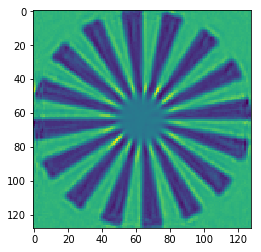

In [38]:
plt.imshow(predict_test[3,0,:,:])

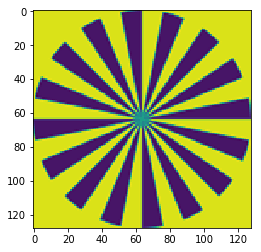

In [39]:
plt.imshow(test_output_dataset[3,:,:])

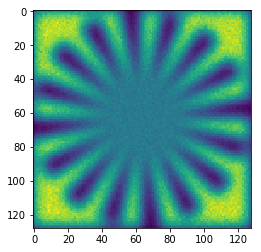

In [45]:
plt.imshow(test_input_dataset[3,199,:,:])